In [21]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import json
import plotly.express as px

In [2]:
path = Path('sitka_weather_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)
print(header_row)

['STATION', 'NAME', 'DATE', 'TAVG', 'TMAX', 'TMIN']


In [3]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN


In [4]:
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

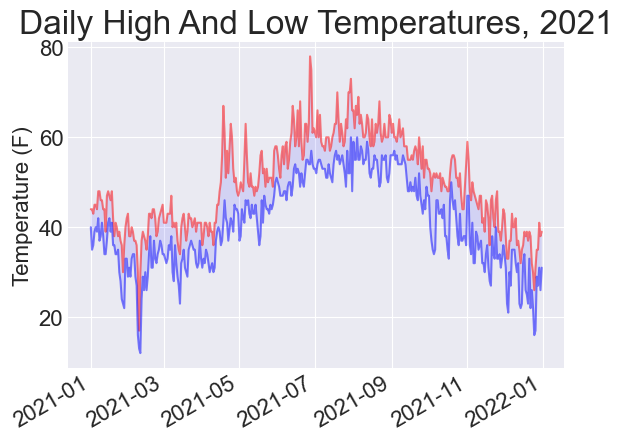

In [5]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots()
ax.plot(dates, highs, color = 'red', alpha = 0.5)
ax.plot(dates, lows, color = 'blue', alpha = 0.5)
ax.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)
ax.set_title("Daily High And Low Temperatures, 2021", fontsize = 24)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 16)
ax.tick_params(labelsize = 16)
plt.show()

In [6]:
path = Path('death_valley_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

In [7]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TMAX
4 TMIN
5 TOBS


In [8]:
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing Data For {current_date}")
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

Missing Data For 2021-05-04 00:00:00


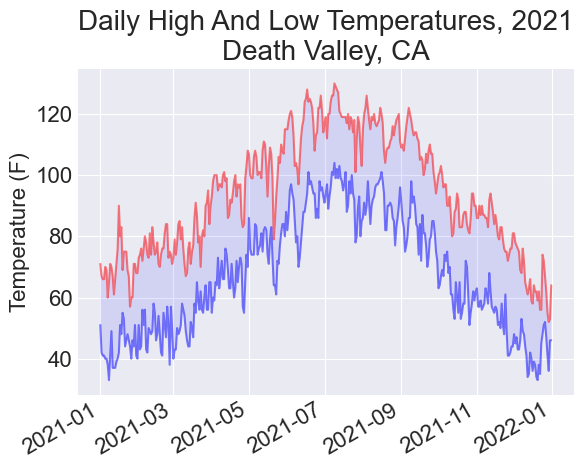

In [9]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots()
ax.plot(dates, highs, color = 'red', alpha = 0.5)
ax.plot(dates, lows, color = 'blue', alpha = 0.5)
ax.fill_between(dates, highs, lows, facecolor = 'blue', alpha = 0.1)
title = "Daily High And Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize = 20)
ax.set_xlabel('', fontsize = 16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize = 16)
ax.tick_params(labelsize = 16)
plt.show()

In [13]:
path = Path('eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

In [14]:
path = Path('readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent = 4)
path.write_text(readable_contents)

223652

In [15]:
all_eq_dicts = all_eq_data['features']
print(len(all_eq_dicts))

160


In [20]:
mags, lons, lats = [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

print(mags[:10])
print(lons[:5])
print(lats[:5])

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]
[-150.7585, -153.4716, -148.7531, -159.6267, -155.248336791992]
[61.7591, 59.3152, 63.1633, 54.5612, 18.7551670074463]


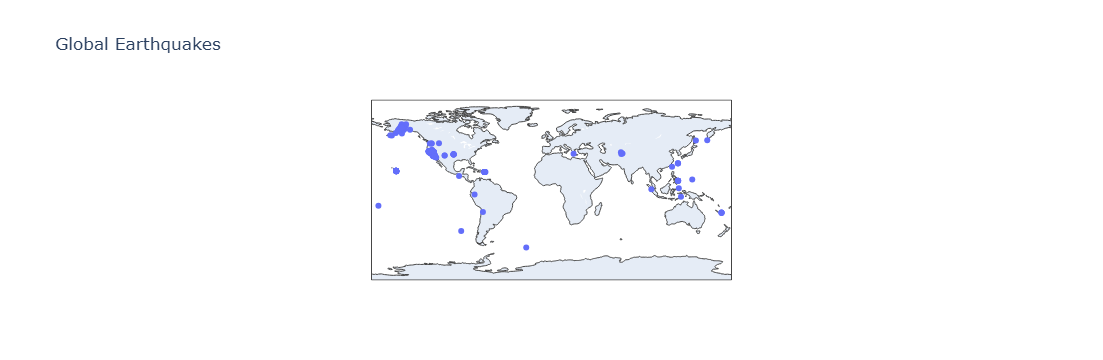

In [22]:
title = 'Global Earthquakes'
fig = px.scatter_geo(lat = lats, lon = lons, title = title)
fig.show()

In [23]:
path = Path('eq_data_30_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

In [24]:
path = Path('readable_eq_data.geojson')
readable_contents = json.dumps(all_eq_data, indent = 4)
path.write_text(readable_contents)

8863057

In [25]:
all_eq_dicts = all_eq_data['features']
print(len(all_eq_dicts))

6359


In [32]:
mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    eq_titles.append(eq_title)

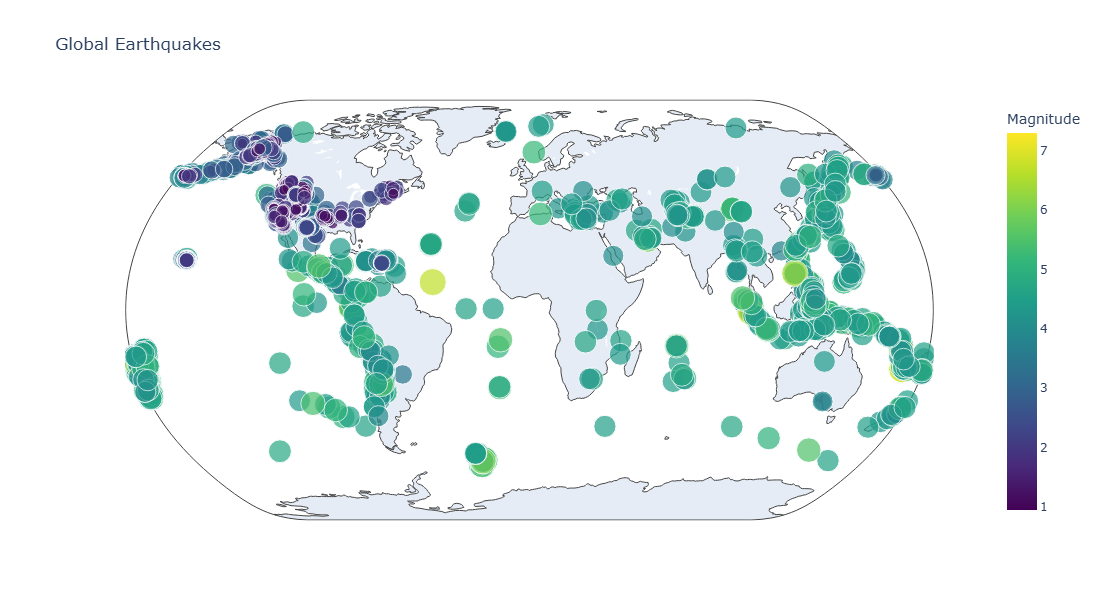

In [33]:
title = 'Global Earthquakes'
fig = px.scatter_geo(lat = lats, lon = lons, size = mags, title = title, color = mags, color_continuous_scale = 'viridis', labels = {'color': 'Magnitude'}, projection = 'natural earth', hover_name = eq_titles, )
fig.update_layout(
    width=1000,
    height=600
)
fig.show()